# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit.

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

The data represents their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given data and advise management on what to do to increase sales and profit as intended in the compaign.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.











In [1]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from statsmodels.formula.api import ols
%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [2]:
#Reading the data

data = pd.read_csv('superstore data (1).csv',
                   parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

# Sanity Checks

In [3]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [4]:
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [5]:
data.shape

(51290, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

### Changing Data Types

In [7]:
#changing data types of: Row ID, Order Date, Ship Date, Postal Code
data['Row ID']= data['Row ID'].astype('object')
data['Order Date']=pd.to_datetime(data['Order Date'], dayfirst= True, format= 'mixed')
data['Ship Date']=pd.to_datetime(data['Ship Date'], dayfirst= True, format= 'mixed')

In [8]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

Postal Code has 41296 missing values. This will be later inspected.

### Inspecting Missing Values

In [9]:
data['Postal Code'].value_counts(normalize=True)

Postal Code
10035.0    0.026316
10024.0    0.023014
10009.0    0.022914
94122.0    0.020312
10011.0    0.019312
             ...   
48858.0    0.000100
60462.0    0.000100
83501.0    0.000100
94061.0    0.000100
77536.0    0.000100
Name: proportion, Length: 631, dtype: float64

In [10]:
#checking the number of unique values
data['Postal Code'].nunique()

631

In [11]:
data[['City', 'Postal Code']].head(30)

,City,Postal Code
0,Constantine,NaN
1,Wagga Wagga,NaN
2,Budapest,NaN
3,Stockholm,NaN
4,Wagga Wagga,NaN
5,Wagga Wagga,NaN
6,Dhaka,NaN
7,Mission Viejo,92691.0
8,Luanda,NaN
9,Yingcheng,NaN


In [12]:
data[(data['Country'] == 'Canada') & (pd.notna(data['Postal Code']))]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


The filter for Canada was to identify if at least one entry had a postal code that could potentially have been used to find the rest of the postal codes for that area.

In [13]:
data.drop(columns='Postal Code', inplace= True)

Since about 80% of data from the "Postal Code" column is missing, without a way of correctly filling them out, and the "City" together with the "State" column provide information about location, the "Postal Code" column was dropped.

In [14]:
data.duplicated().sum()

0

There is no duplicated data

### Inspecting Columns

In [15]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [16]:
data.dtypes

Row ID                    object
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [17]:
#segregating data into categorical and continuous 
num_var=data.select_dtypes(include=np.number)
cat_var=data.select_dtypes(include='object')

In [18]:
num_var.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [19]:
cat_var.describe()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,51290,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,42433,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,1,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [20]:
data['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [21]:
data['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [22]:
data['City'].unique()

array(['Constantine', 'Wagga Wagga', 'Budapest', ..., 'Missoula',
       'Lannion', 'Deer Park'], dtype=object)

In [23]:
data['State'].unique()

array(['Constantine', 'New South Wales', 'Budapest', ..., 'Medea',
       'Jizzakh', 'Inhambane'], dtype=object)

In [24]:
data['Country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh',
       'United States', 'Angola', 'China', 'Panama', 'Iran', 'France',
       'Italy', 'Germany', 'Canada', 'United Kingdom', 'Ukraine', 'Japan',
       'Indonesia', 'Nigeria', 'South Korea', 'Peru', 'Philippines',
       'Colombia', 'Ireland', 'Nicaragua', 'Mexico', 'Brazil', 'Turkey',
       'Spain', 'Poland', 'India', 'Somalia', 'El Salvador', 'Sudan',
       'Slovakia', 'Egypt', 'Saudi Arabia',
       'Democratic Republic of the Congo', 'Norway', 'New Zealand',
       'Kenya', 'Cuba', 'Venezuela', 'Singapore', 'Honduras', 'Tanzania',
       'Dominican Republic', 'Morocco', 'Albania', 'Belgium',
       'Afghanistan', 'Bolivia', 'Vietnam', 'Guatemala', 'Guinea-Bissau',
       'Thailand', 'Iraq', 'Myanmar (Burma)', 'Ecuador', 'Netherlands',
       'Ghana', "Cote d'Ivoire", 'Austria', 'Argentina', 'Madagascar',
       'Russia', 'South Africa', 'Bosnia and Herzegovina', 'Malaysia',
       'Romania', 'Israel', 'Burundi', '

In [25]:
data['Market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [26]:
data['Region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

In [27]:
data['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [28]:
data['Sub-Category'].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Copiers',
       'Bookcases', 'Appliances', 'Art', 'Accessories', 'Binders',
       'Labels', 'Envelopes', 'Chairs', 'Machines', 'Tables', 'Phones',
       'Fasteners'], dtype=object)

In [29]:
data['Order Priority'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

# Feature Engineering

In [30]:
#creating a 'Unit Price' column
data['Unit Price']= data['Sales']/data['Quantity']

In [31]:
#calculating the duration from order to delivery
data['Duration']= (data['Ship Date']-data['Order Date']).astype(str)
data['Duration']=data['Duration'].str.strip('days')
data['Duration']=data['Duration'].astype(int)

In [32]:
#splitting the order date monthly and yearly
data['Year']=data['Order Date'].dt. strftime('%Y')
data['Month']=data['Order Date'].dt. strftime('%m') 

In [33]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Duration,Year,Month
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,5,2011,01
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,7,2011,01
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,4,2011,01
3,11731,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,14.955,4,2011,01
4,22255,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,22.734,7,2011,01


'Unit Price' and 'Duration' column have been added to the data

In [34]:
data.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost,Unit Price,Duration
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174272,246.490581,3.476545,0.142908,28.610982,26.375915,71.657487,3.969370
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.336000,0.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,11.799900,3.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,29.400000,4.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,82.160000,5.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,3773.080000,7.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,113.581515,1.729437


In [35]:
num_var=data.select_dtypes(include=np.number)

# Exploratory Data Analysis

## Univariate Analysis

### Plotting Numerical Variables

In [36]:
def plot_numeric(column):
    sns.histplot(x= column, data=data, color='mediumblue', kde=True)
    plt.title('Distribution of '+ column)

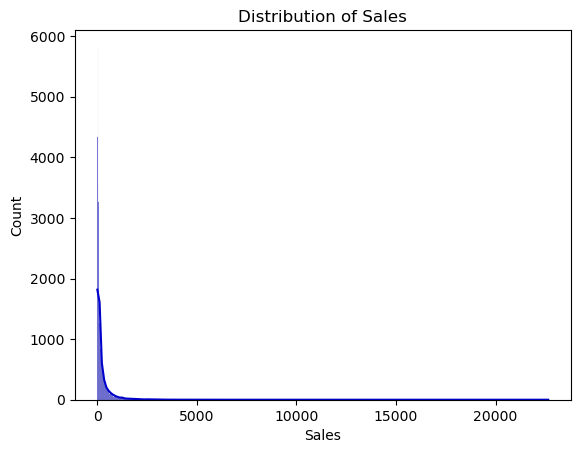

In [37]:
plot_numeric('Sales')

The distribution of the 'Sales' is highly skewed to the right. The lower amount of sales are more frequently occuring.

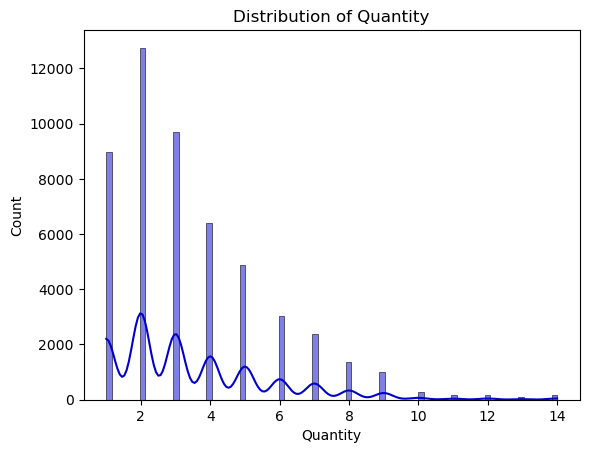

In [38]:
plot_numeric('Quantity')

The distribution of 'Quantity' shows a continuous decline in frequency from 2 to 14. High number of customers seem to purchase items in quantity of twos.

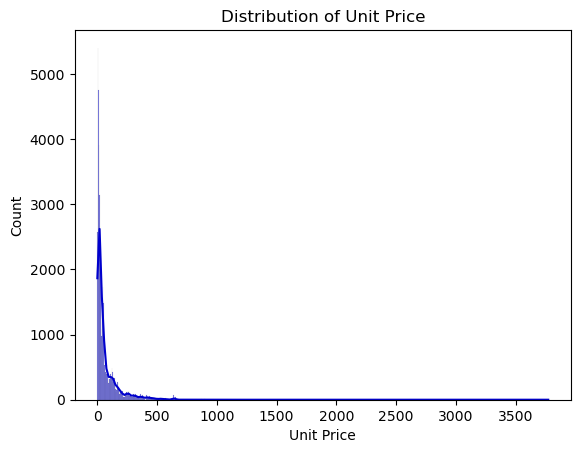

In [39]:
plot_numeric('Unit Price')

The distribution of the 'Unit Price' is highly skewed to the right. The lower price items are more frequently occuring.

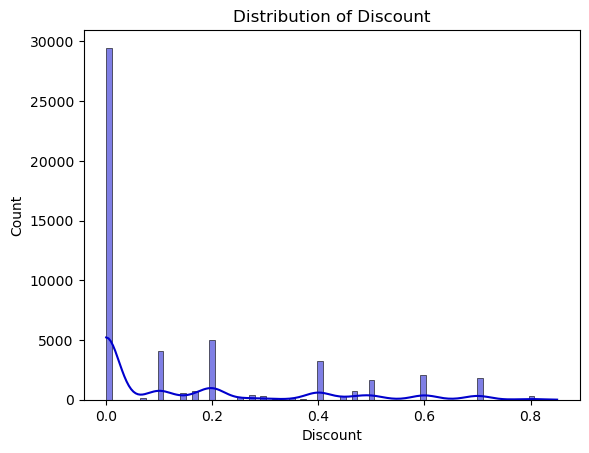

In [40]:
plot_numeric('Discount')

The distribution of 'Discount' is highly skewed to the right

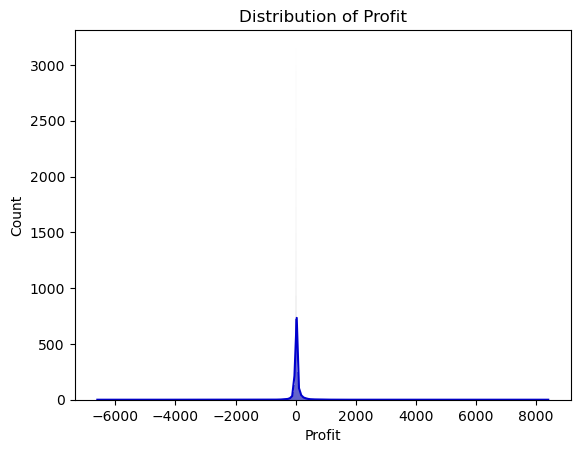

In [41]:
plot_numeric('Profit')

'Profit' displays a normal distribution.

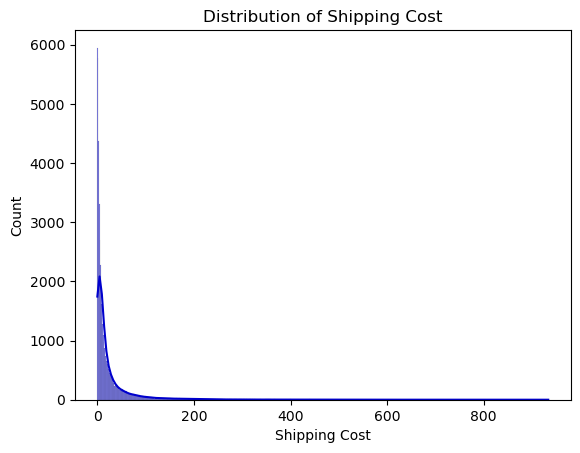

In [42]:
plot_numeric('Shipping Cost')

The distribution of 'Shipping Cost' is highly skewed to the right. The low shipping costs are the most frequently occuring.

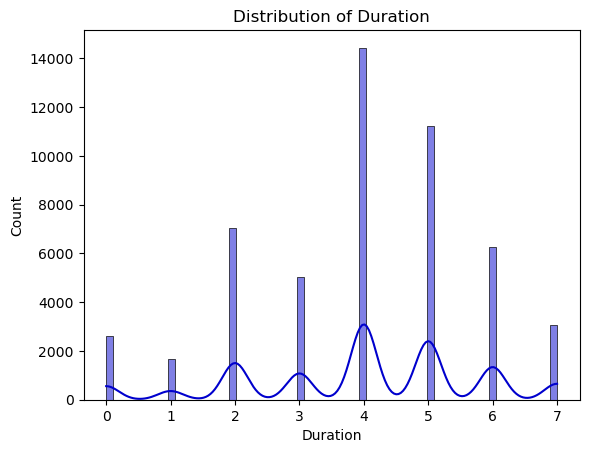

In [43]:
plot_numeric('Duration')

The distribution of 'Duration' fluctuates with the peak being 4 days

### Plotting Categorical Variables

In [44]:
#function to add data labels to categorical values
def show_percent_h():
    total = len(data)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height / total:.0%}', ha="center")
        
        
def show_percent_v():
    total = len(data)
    for p in plt.gca().patches:
        width = p.get_width()
        plt.text(width + 0.2, p.get_y() + p.get_height() / 2., f'{width / total:.0%}', va="center")

In [45]:
#function to plot categorical values
def plot_cat(column, order):
    sns.countplot(x=column, data=data, color='mediumturquoise', order=order)
    plt.title('Count of '+ column)
    show_percent_h()

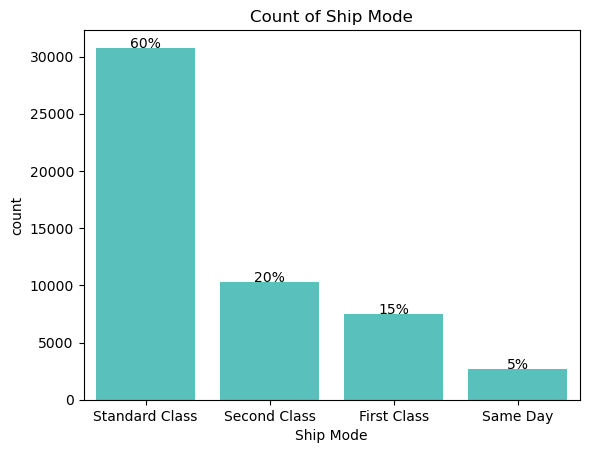

In [46]:
smorder=data['Ship Mode'].value_counts().index
plot_cat('Ship Mode', smorder)

'Standard Class' was the most utilised ship mode while 'Same Day' was the least.

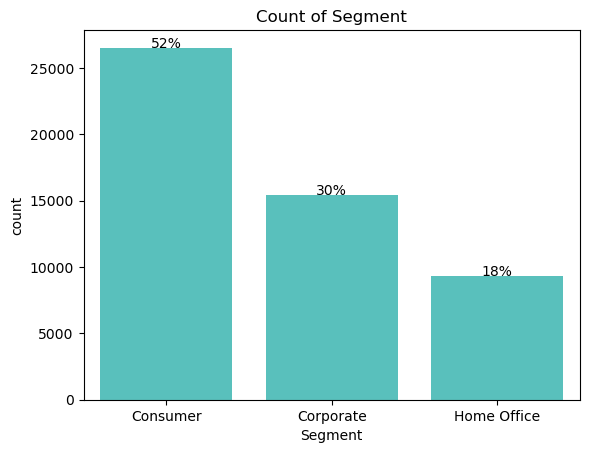

In [47]:
segorder=data['Segment'].value_counts().index
plot_cat('Segment', segorder)

The 'Consumer' was the most patronized segment while 'Home Office' was the least

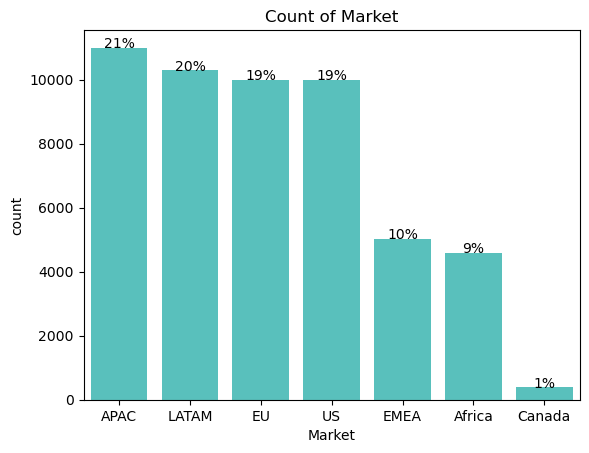

In [48]:
morder=data['Market'].value_counts().index
plot_cat('Market', morder)

APAC accounted for the highest percentage of the market while Canada had the least.

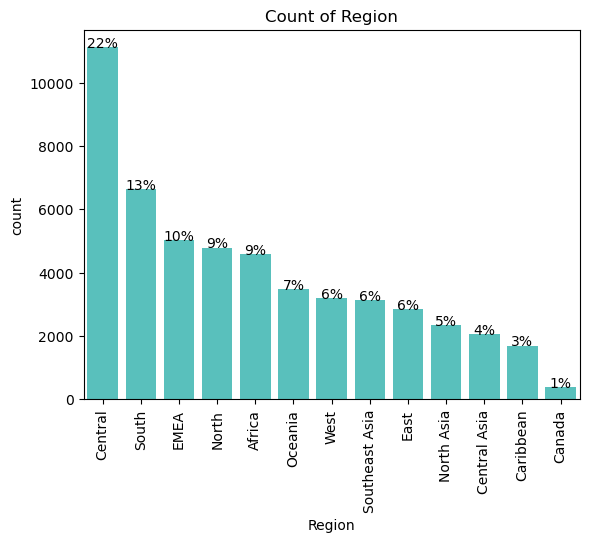

In [49]:
rorder=data['Region'].value_counts().index
plot_cat('Region', rorder)
plt.xticks(rotation=90)
plt.show()

The highest number of orders were fromt the Central Region while the least was from Canada.

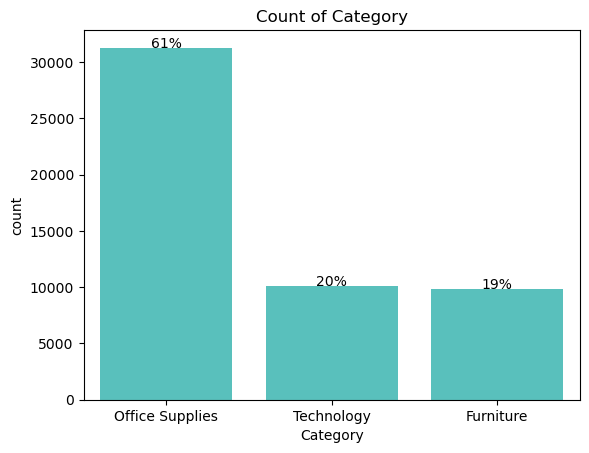

In [50]:
corder=data['Category'].value_counts().index
plot_cat('Category', corder)

Office Supplies category has the highest number of orders while Furniture has the least.

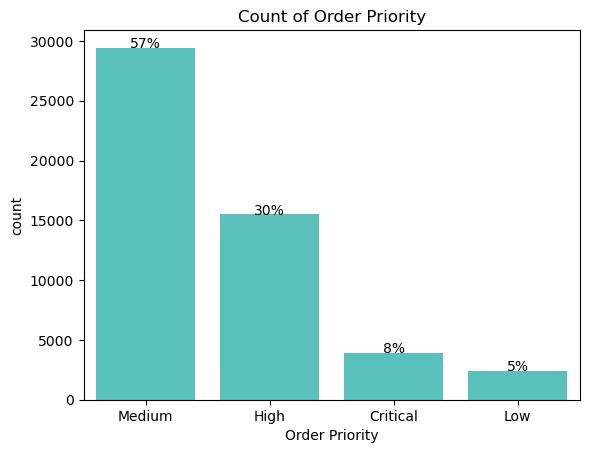

In [51]:
oporder=data['Order Priority'].value_counts().index
plot_cat('Order Priority', oporder)

The highest number of orders was from the 'Medium order priority.

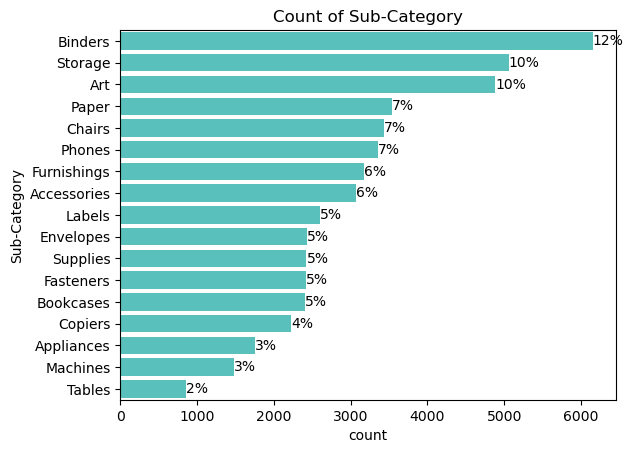

In [52]:
scorder=data['Sub-Category'].value_counts().index
sns.countplot(y='Sub-Category', data=data, color='mediumturquoise', order=scorder)
plt.title('Count of Sub-Category')
show_percent_v()

Binders was the most ordered Sub-Category while Tables was the least.

Text(0.5, 1.0, 'Count of Sub-Category')

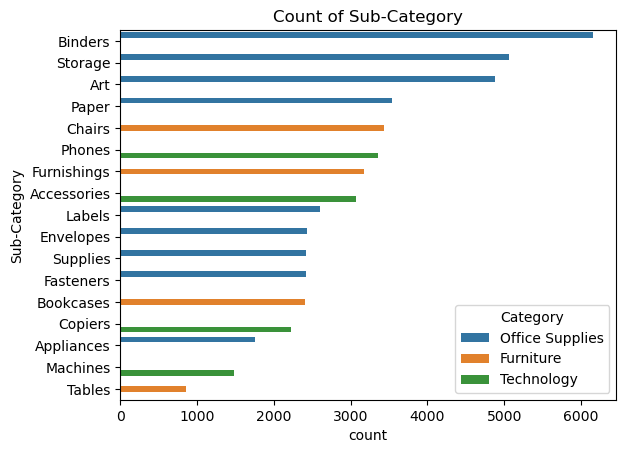

In [85]:
sns.countplot(y='Sub-Category', data=data, hue='Category', order=scorder)
plt.title('Count of Sub-Category')

Binders were the most ordered sub-category in the office category 

Chairs were the most ordered in the furniture category

Phones were the most ordered in the technology category.

<Axes: xlabel='Month', ylabel='Sales'>

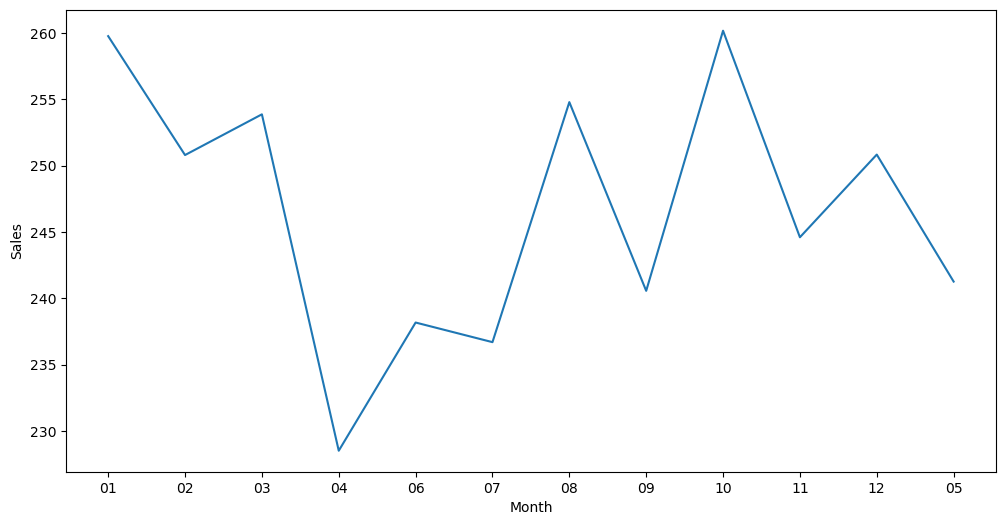

In [54]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data,x='Month',y='Sales',ci=None, sort=True)

October had the highest average sales across the four-year period

<Axes: xlabel='Month', ylabel='Profit'>

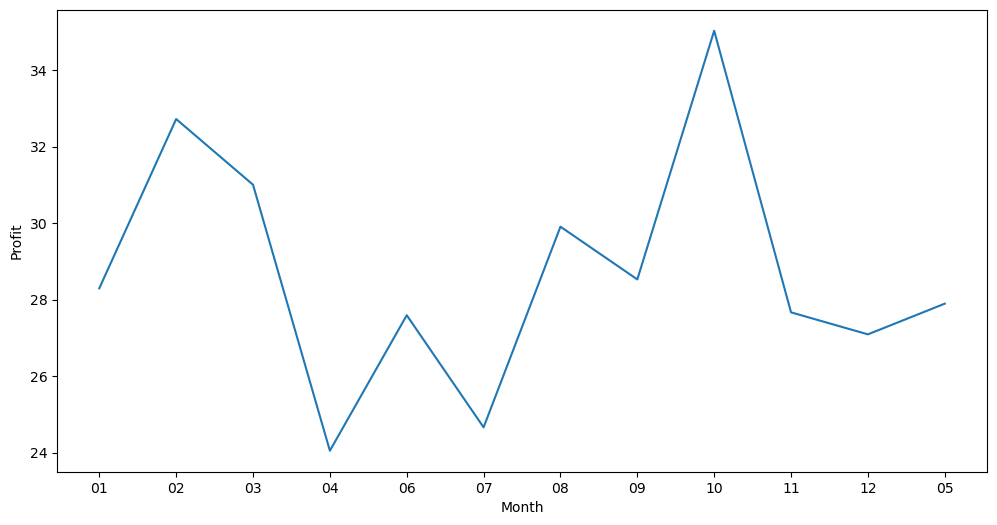

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data,x='Month',y='Profit',ci=None, sort=True)

October had the highest profit across the four-year period

<Axes: xlabel='Year', ylabel='Sales'>

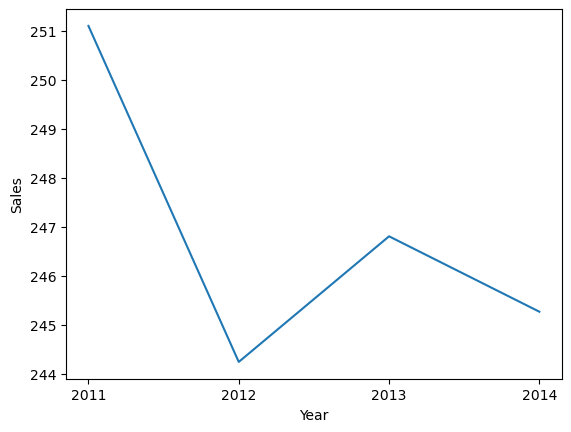

In [56]:
sns.lineplot(data=data,x='Year',y='Sales',ci=None, sort=True)

2011 had the highest sales, with a steep drop in sales the following year.

<Axes: xlabel='Year', ylabel='Profit'>

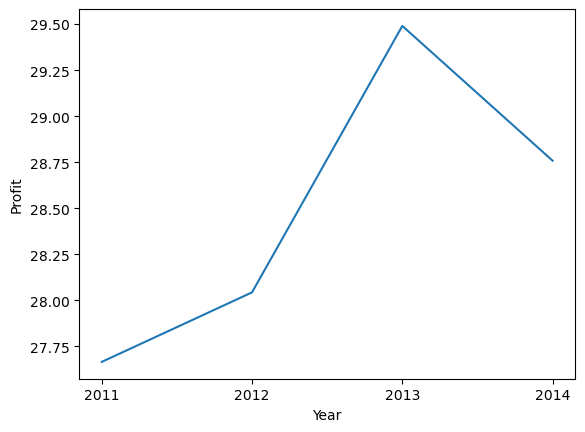

In [57]:
sns.lineplot(data=data,x='Year',y='Profit',ci=None, sort=True)

Profits rose each year till peak in 2013 before declining in 2014.

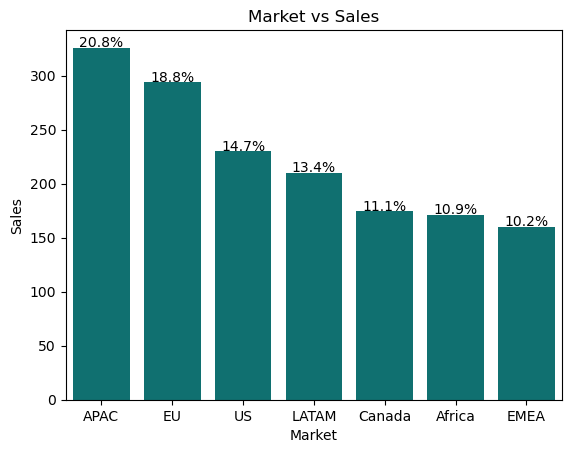

In [58]:
msorder=data.groupby('Market')[['Sales']].mean().sort_values(by='Sales',ascending=False)
sns.barplot(data=data,x='Market',y='Sales',color='teal',ci=None, order=msorder.index)
plt.title('Market vs Sales')
for index, value in enumerate(msorder['Sales']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / msorder['Sales'].sum()) * 100), ha='center')

APAC market had the highest sales while EMEA had the lowest

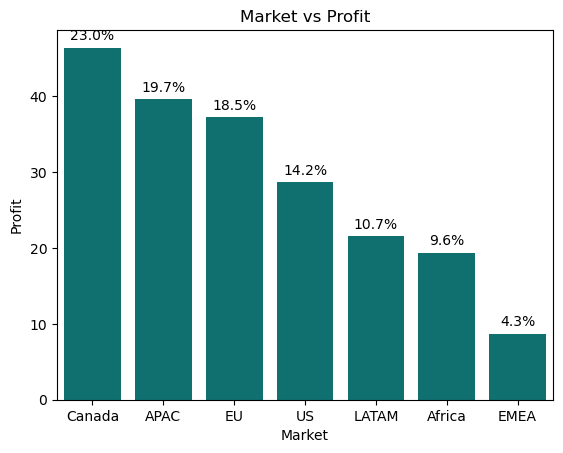

In [59]:
mporder=data.groupby('Market')[['Profit']].mean().sort_values(by='Profit',ascending=False)
sns.barplot(data=data,x='Market',y='Profit',ci=None,color='teal', order=mporder.index)
plt.title('Market vs Profit')
for index, value in enumerate(mporder['Profit']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / mporder['Profit'].sum()) * 100), ha='center')

Text(0.5, 1.0, 'Relationship Between Sales and Discount')

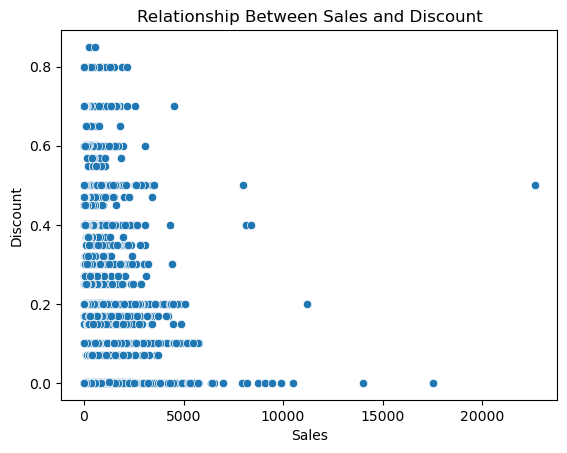

In [60]:
sns.scatterplot(data=data,x='Sales',y='Discount')
plt.title('Relationship Between Sales and Discount')

There is a negligible relationship between sales and discount.In this weak relationship, there were generally higher sales for low discounts

Text(0.5, 1.0, 'Relationship Between Shipping Cost and Sales')

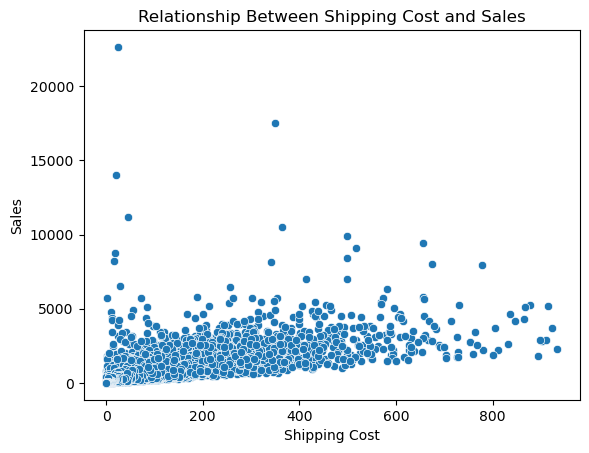

In [61]:
sns.scatterplot(data=data,x='Shipping Cost',y='Sales')
plt.title('Relationship Between Shipping Cost and Sales')

There is a moderately strong relationship between sales and shipping costs. Increasing shipping cost reflect increasing sales.

Text(0.5, 1.0, 'Sales per Market by Category')

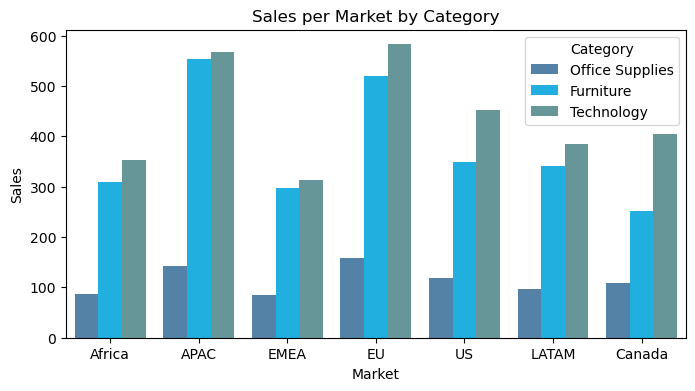

In [62]:
plt.figure(figsize=(8,4))
sns.barplot(x='Market', y='Sales', hue='Category', palette=['steelblue','deepskyblue', 'cadetblue'], ci=None, data=data)
plt.title('Sales per Market by Category')


Technology produced the highest average sales across all markets, with office supplies being the lowest

Text(0.5, 1.0, 'Profit per Market by Category')

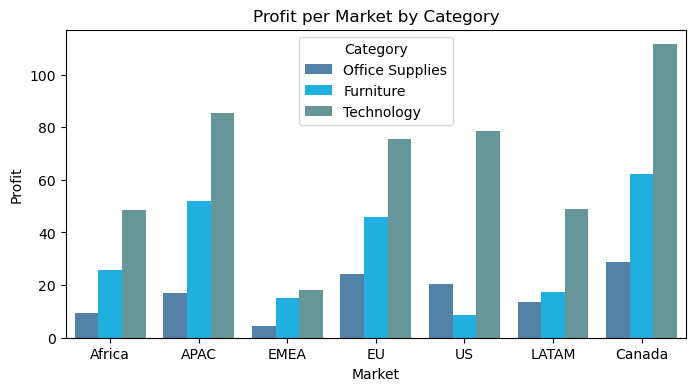

In [63]:
plt.figure(figsize=(8,4))
sns.barplot(x='Market', y='Profit', hue='Category', palette=['steelblue','deepskyblue', 'cadetblue'], ci=None, data=data)
plt.title('Profit per Market by Category')


Technology generated the highest average sales across all markets, with office supplies being the lowest

In [176]:
losses=data[data['Profit']<=0][['Market', 'Profit', 'Category', 'Segment', 'Product Name']]

Text(0.5, 1.0, 'Category vs Loss')

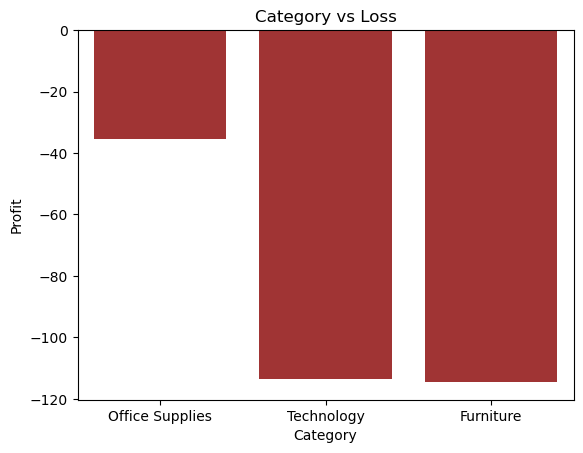

In [65]:
sns.barplot(x='Category',y='Profit', data=losses, color='firebrick', errorbar=None)
plt.title('Category vs Loss')

Furniture caused the highest amount of losses while office supplies had the least amount of losses with respect to category.

Text(0.5, 1.0, 'Market vs Loss')

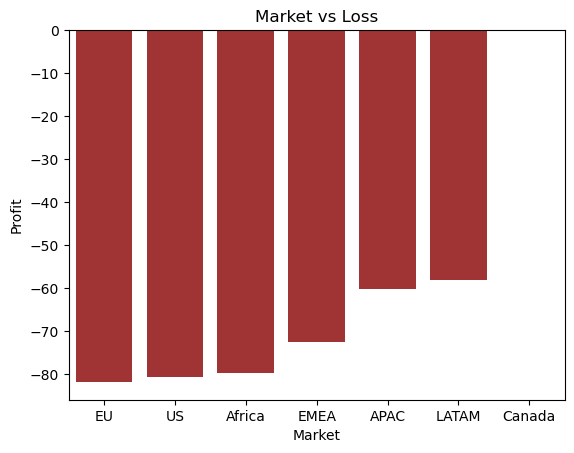

In [66]:
losorder= losses.groupby('Market')['Profit'].mean().sort_values().index
sns.barplot(x='Market',y='Profit', data=losses, order=losorder, color='firebrick', ci=None)
plt.title('Market vs Loss')

EU recorded the highest loss per market while Canada recorded no loss at all.

Text(0.5, 1.0, 'Market vs Loss')

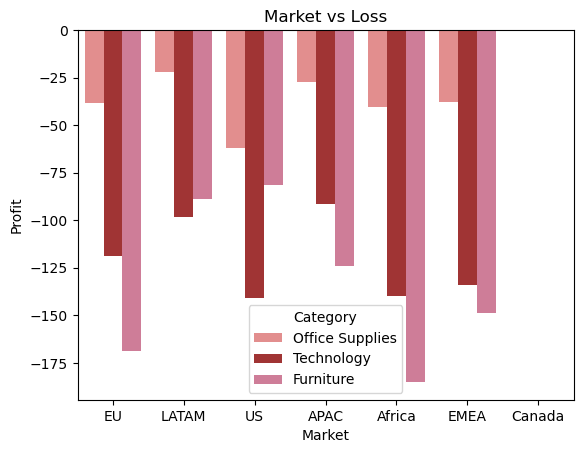

In [67]:
sns.barplot(x='Market',y='Profit', data=losses, hue='Category',palette=['lightcoral','firebrick','palevioletred'], ci=None)
plt.title('Market vs Loss')

Furniture recorded the highest loss across all markets except in LATAM and US where technology recorded the highest losses

In [182]:
cpnloss=losses.groupby(['Market', 'Category','Product Name'])[['Profit']].mean().sort_values(by='Profit',ascending=True)
cpnloss.reset_index(level=2)

Product Name     Profit
Market Category                                                             
US     Technology       Cubify CubeX 3D Printer Double Head Print -4619.9846
EMEA   Technology                  Motorola Smart Phone, Cordless -4088.3760
US     Technology       Cubify CubeX 3D Printer Triple Head Print -3839.9904
       Office Supplies       Ibico EPK-21 Electric Binding System -2929.4845
EMEA   Furniture           Barricks Conference Table, Rectangular -2750.2800
...                                                           ...        ...
EU     Office Supplies                KitchenAid Microwave, Black     0.0000
EMEA   Technology                         HP Fax Machine, Digital     0.0000
US     Furniture                   Global Leather Executive Chair     0.0000
       Furniture                   Hon Non-Folding Utility Tables     0.0000
Canada Technology          Samsung Signal Booster, with Caller ID     0.0000

[6225 rows x 2 columns]

Though furniture had the highest average loss, technology product had the highest loss.

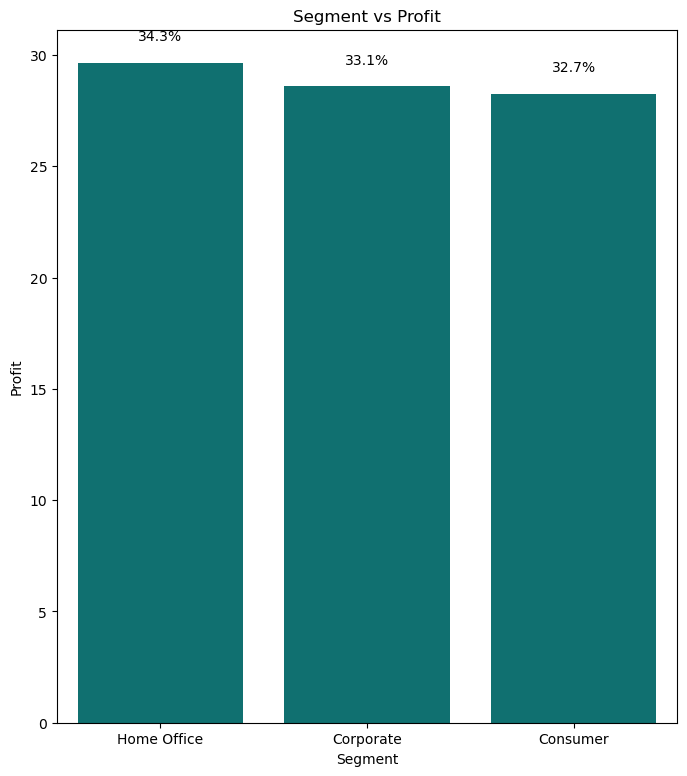

In [68]:
sporder=data.groupby('Segment')[['Profit']].mean().sort_values(by='Profit',ascending=False)
plt.figure(figsize=(8,9))
sns.barplot(data=data,x='Segment',y='Profit',errorbar=None,color='teal', order=sporder.index)
plt.title('Segment vs Profit')
for index, value in enumerate(sporder['Profit']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / sporder['Profit'].sum()) * 100), ha='center')

Home office segment produces the highest profit by a thin margin of 1.2%

Text(0.5, 1.0, 'Relationship Between Shipping Cost and Profit')

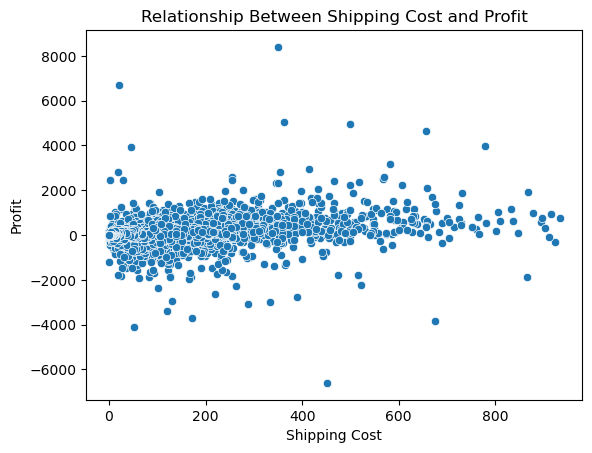

In [69]:
sns.scatterplot(data=data,x='Shipping Cost',y='Profit')
plt.title('Relationship Between Shipping Cost and Profit')

There is a weak relationship between profit and shipping cost

Text(0.5, 1.0, 'Relationship Between Quantity and Profit')

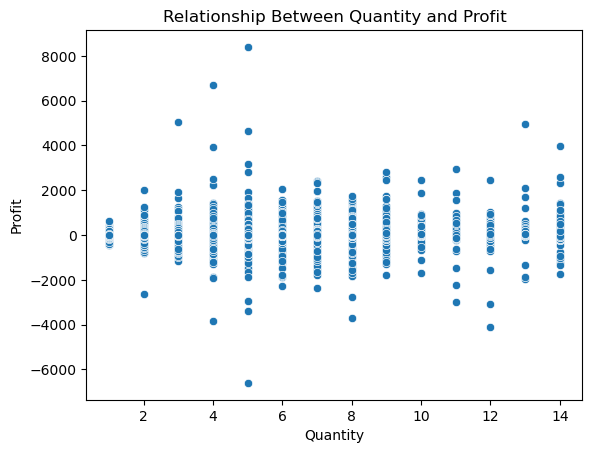

In [70]:
sns.scatterplot(data=data,x='Quantity',y='Profit')
plt.title('Relationship Between Quantity and Profit')

There is no visible relationship between quantity and profit

Text(0.5, 1.0, 'Relationship Between Duration and Sales')

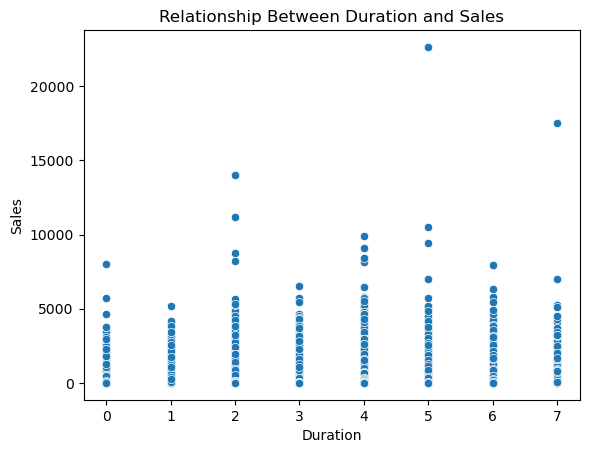

In [71]:
sns.scatterplot(data=data,x='Duration',y='Sales')
plt.title('Relationship Between Duration and Sales')

There is no visible relationship between duration and sales

Text(0.5, 1.0, 'Relationship Between Duration and Profit')

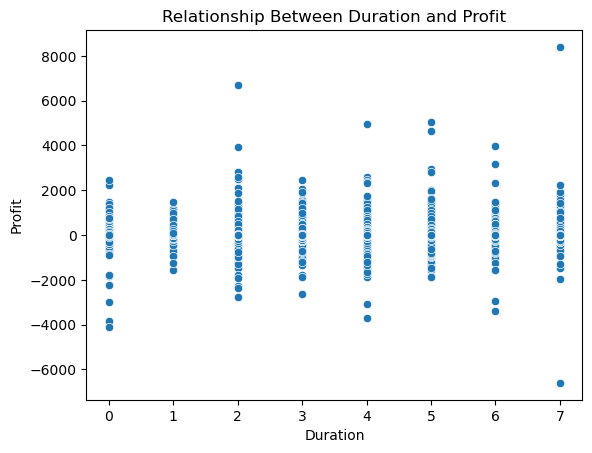

In [72]:
sns.scatterplot(data=data,x='Duration',y='Profit')
plt.title('Relationship Between Duration and Profit')

There is no visible relationship between duration and sales

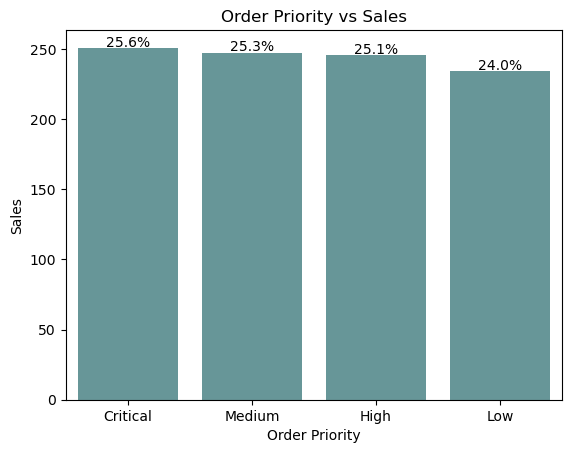

In [73]:
soporder=data.groupby('Order Priority')[['Sales']].mean().sort_values(by='Sales',ascending=False)
sns.barplot(data=data,x='Order Priority',y='Sales', order=soporder.index, color='cadetblue',ci=None)
plt.title('Order Priority vs Sales')
for index, value in enumerate(soporder['Sales']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / soporder['Sales'].sum()) * 100), ha='center')

Though 'Critical' is the order priority with the highest sales, it is observed that order prioirty does not affect the sales as there is negligible difference in the perentage of sales across board

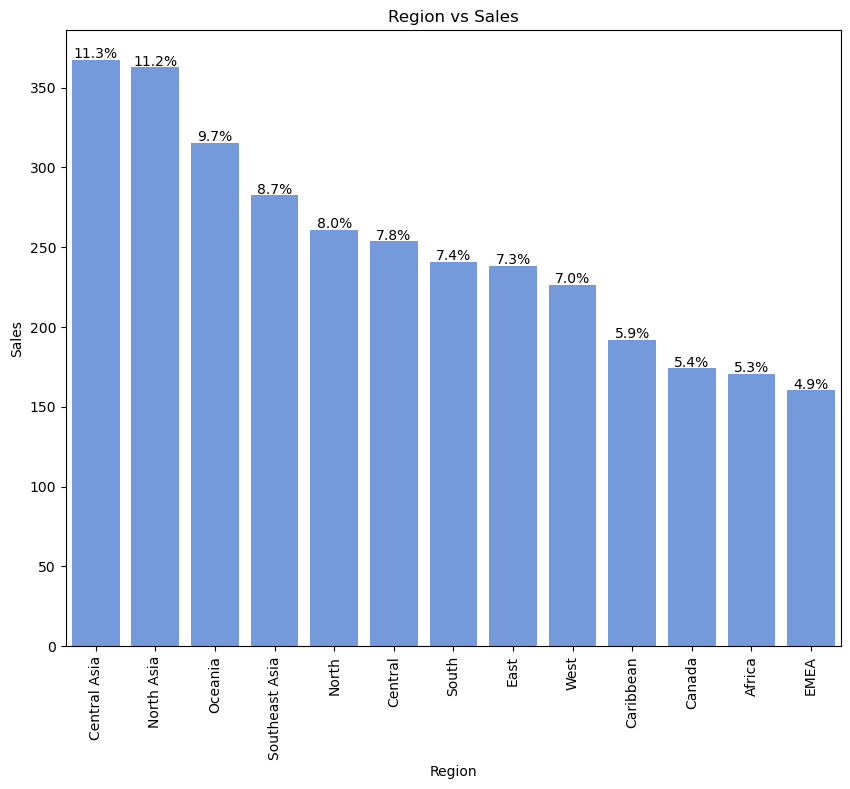

In [74]:
rsorder=data.groupby('Region')[['Sales']].mean().sort_values(by='Sales',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=data,x='Region',y='Sales', order=rsorder.index,color='cornflowerblue',ci=None)
plt.xticks(rotation=90)
plt.title('Region vs Sales')
for index, value in enumerate(rsorder['Sales']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / rsorder['Sales'].sum()) * 100), ha='center')

Central Asia has the highest average sales in the regions while EMEA has the least.

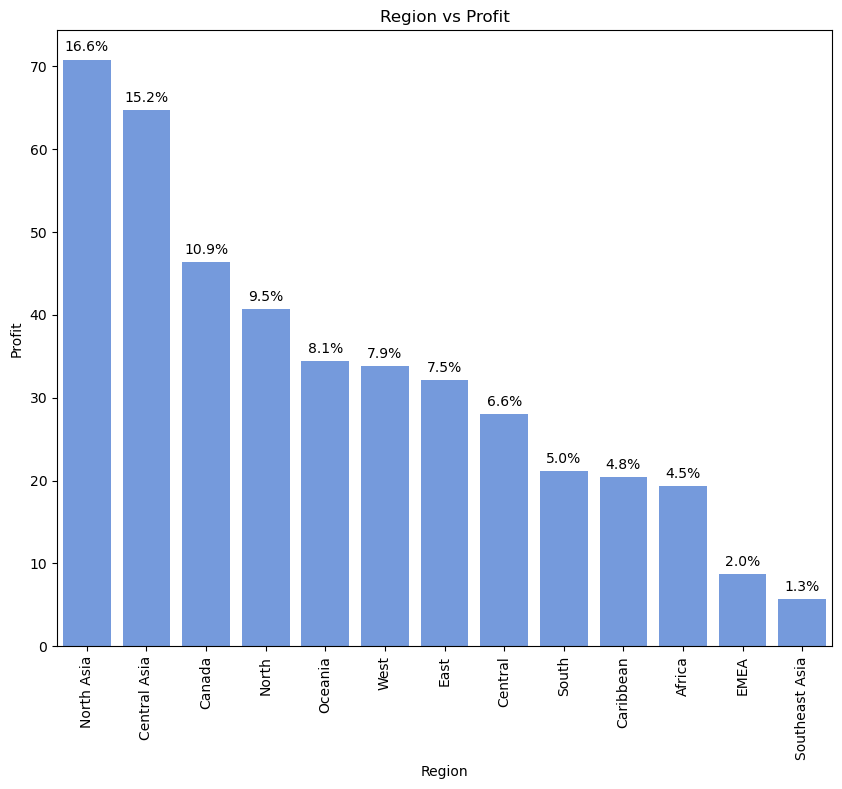

In [75]:
rporder=data.groupby('Region')[['Profit']].mean().sort_values(by='Profit',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=data,x='Region',y='Profit', order=rporder.index, color='cornflowerblue', ci=None)
plt.xticks(rotation=90)
plt.title('Region vs Profit')
for index, value in enumerate(rporder['Profit']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / rporder['Profit'].sum()) * 100), ha='center')

North Asia has the highest average profit generated across the regions.

Unlike in the sales, Southeast Asia had the lowest average profit likely because of the losses.

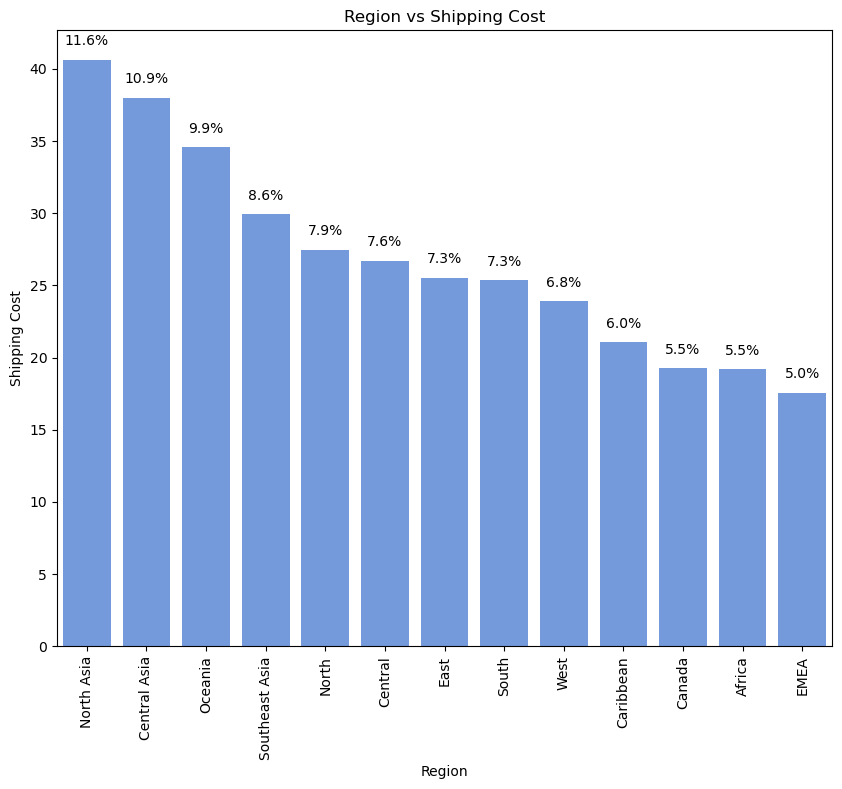

In [76]:
rscorder=data.groupby('Region')[['Shipping Cost']].mean().sort_values(by='Shipping Cost',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=data,x='Region',y='Shipping Cost', order=rscorder.index, color='cornflowerblue', ci=None)
plt.xticks(rotation=90)
plt.title('Region vs Shipping Cost')
for index, value in enumerate(rscorder['Shipping Cost']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / rscorder['Shipping Cost'].sum()) * 100), ha='center')

North Asia has the highest average amount of shipping cost.

<Axes: >

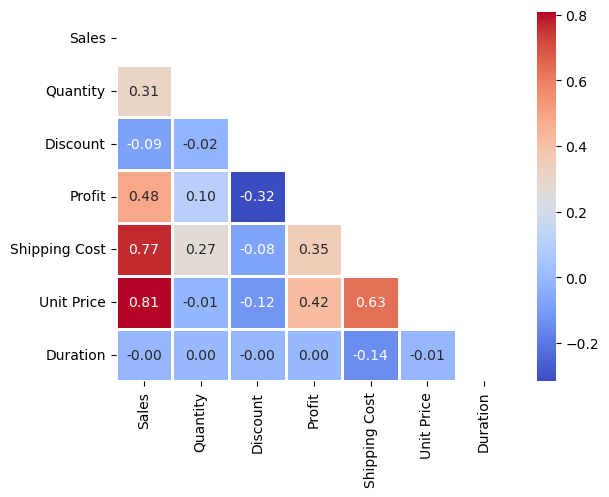

In [93]:
cor= num_var.corr()
mask = np.triu(np.ones_like(cor,dtype=bool))


sns.heatmap(cor,annot = cor,mask=mask,
            cmap = 'coolwarm',linewidth=1,
            fmt=".2f")

The correlation of the continuous variables in the data were used to plot a heatmap to narrow down the selection of variables that may affect sales and profit.

Shipping cost, Quantity, Unit Price and Profit were observed to correlate with Sales. It is important to note however, that the correlation between sales and profit is due to the effect sales has on profit and not vice versa.

Profit has correlation to Unit Price, Shipping Cost, Sales and Discount.

# Regression Analysis

## Sales

In [119]:
predictor=data[['Sales','Quantity','Shipping Cost','Unit Price']]
predictor.rename(columns={'Sales':'sales','Quantity':'quantity','Shipping Cost': 'shipping_cost','Unit Price':'unit_price'},inplace=True)

In [120]:
X = predictor.drop('sales',axis=1)
y = predictor['sales']

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [122]:
X_train['sales'] = y_train

In [123]:
multi_reg = ols('sales ~ quantity +shipping_cost + unit_price+ shipping_cost:unit_price + 0',data = X_train).fit()

In [124]:
multi_reg.params

quantity                    19.916528
shipping_cost                2.359803
unit_price                   1.922925
shipping_cost:unit_price     0.003207
dtype: float64

From the regression analysis above, the regression equation is shown below.

### Regression Equation.

Sales=19.92(__Quantity__)+2.36(__Shipping Cost__)+1.92(__Unit Price__)

This shows that if quantity, shipping cost and unit price are increased, sales will also increase.

Thus, for the company to increases sales, it should consider advertisement to increase the quantity bought due to its high effect on sales.

In [125]:
rsquared = multi_reg.rsquared
print(rsquared)

0.8351086888387516


About 83.5% of the features explain the variance of the Sales.

In [ ]:
print(multi_reg.summary())

## Profit

In [135]:
profit_predictor=data[['Sales','Quantity','Shipping Cost','Unit Price','Profit', 'Discount']]
profit_predictor.rename(columns={'Sales':'sales','Quantity':'quantity','Shipping Cost': 'shipping_cost','Unit Price':'unit_price','Profit':'profit'},inplace=True)

In [137]:
X = profit_predictor.drop('profit',axis=1)
y = profit_predictor['profit']

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [139]:
X_train['profit'] = y_train

In [140]:
interraction_multi_reg = ols('profit ~ sales*quantity*shipping_cost*unit_price*Discount+ 0',data = X_train).fit()

In [141]:
interraction_multi_reg.params

sales                                               1.042620e-01
quantity                                            1.162113e+00
sales:quantity                                      1.084367e-02
shipping_cost                                       3.341985e-01
sales:shipping_cost                                -2.081464e-04
quantity:shipping_cost                             -6.079821e-02
sales:quantity:shipping_cost                        1.943670e-05
unit_price                                         -4.134980e-02
sales:unit_price                                    1.180399e-04
quantity:unit_price                                 1.042620e-01
sales:quantity:unit_price                          -1.830847e-05
shipping_cost:unit_price                            1.106862e-03
sales:shipping_cost:unit_price                     -1.623214e-07
quantity:shipping_cost:unit_price                  -2.081464e-04
sales:quantity:shipping_cost:unit_price             6.277454e-08
Discount                 

In [142]:
profit_rsquared = interraction_multi_reg.rsquared
print(profit_rsquared)

0.7491743518933613


About 75% of the selected variables explain the variance in the profit.

## Profit of Furniture Category

Since furniture had the highest average loss it was inspected to see the impact of the variables on its profit.

In [162]:
furniture=pd.DataFrame({'sales':data[data['Category']=='Furniture']['Sales'],
                  'profit':data[data['Category']=='Furniture']['Profit'],
                  'quantity':data[data['Category']=='Furniture']['Quantity'],
                  'unit_price':data[data['Category']=='Furniture']['Unit Price'],
                  'discount':data[data['Category']=='Furniture']['Discount'],
                  'shipping_cost':data[data['Category']=='Furniture']['Shipping Cost']})


In [163]:
furniture.head()

,sales,profit,quantity,unit_price,discount,shipping_cost
4,113.670,37.7700,5,22.734,0.10,4.70
7,290.666,3.4196,2,145.333,0.15,54.64
12,309.600,148.5000,6,51.600,0.00,19.65
24,1314.450,341.7300,3,438.150,0.00,150.40
27,634.116,-172.1172,6,105.686,0.30,70.05


In [164]:
X = furniture.drop('profit',axis=1)
y = furniture['profit']

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [166]:
X_train['profit'] = y_train

In [167]:
furniture_multi_reg = ols('profit ~ sales*quantity*shipping_cost*unit_price*discount+ 0',data = X_train).fit()

In [168]:
furniture_multi_reg.params

sales                                               1.728900e-01
quantity                                           -1.191354e-01
sales:quantity                                      3.248524e-04
shipping_cost                                       1.673165e-01
sales:shipping_cost                                -2.106497e-04
quantity:shipping_cost                             -2.936084e-02
sales:quantity:shipping_cost                        4.207453e-05
unit_price                                         -2.877327e-02
sales:unit_price                                   -1.902689e-04
quantity:unit_price                                 1.728900e-01
sales:quantity:unit_price                          -1.194073e-05
shipping_cost:unit_price                            1.551517e-04
sales:shipping_cost:unit_price                      7.095575e-07
quantity:shipping_cost:unit_price                  -2.106521e-04
sales:quantity:shipping_cost:unit_price            -4.428386e-08
discount                 

It can be observed that sales and shipping cost have a positive correlation with profit.(0.173, 0.1673)

Discount has the strongest positive correlation to profit with a coefficient of 7.269

However, quantity and unit price have a inverse relationship with profit (-0.119,-0.029)

In [169]:
profit_rsquared = interraction_multi_reg.rsquared
print(profit_rsquared)

0.6798733045053145


The 67.99% of features for the furniture category explain the variance in profit

# Conclusion.

 To increase sales and profit, the company  may consider advertisement to increase the quantity bought due to its high effect on sales.
 
 It could also consider giving discounts for the furniture category since an increase in discount shows increase in profit.
 
 Technology sales could be more targeted at the Canadian market since it provides high profit with no accounted loss.
 
 The products with the highest losses can be sold together with high purchased technology to reduce loss.
 
 
 The company consider repricing some of its commodities in the office supplies category with promos. This could potentially increase sales, since the increase in quantity of purchase of such has a drastic effect on sales.
 
 
 